In this tutorial, we train a regression model on housing data to predict the home prices and also see how regularization is used as a technique to avoid overfitting problems.

Here, we will go with EarlyStop as a technique for regularization and also have fewer hidden layers if not much training data is available. This way we can avoid overfitting.

Dataset: Boston Housing

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [0]:
boston_housing = keras.datasets.boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [3]:
'''
# Shuffle the training set
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]
'''

'\n# Shuffle the training set\norder = np.argsort(np.random.random(train_labels.shape))\ntrain_data = train_data[order]\ntrain_labels = train_labels[order]\n'

In [4]:
print("Training: {}".format(train_data.shape))
print("Testig: {}".format(test_data.shape))

Training: (404, 13)
Testig: (102, 13)


Below are the features:

**crim**  per capita crime rate by town.

**zn**  proportion of residential land zoned for lots over 25,000 sq.ft.

**indus**  proportion of non-retail business acres per town.

**chas**  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

**nox**  nitrogen oxides concentration (parts per 10 million).

**rm**  average number of rooms per dwelling.

**age**  proportion of owner-occupied units built prior to 1940.

**dis**  weighted mean of distances to five Boston employment centres.

**rad**  index of accessibility to radial highways.

**tax**  full-value property-tax rate per $10,000.

**ptratio**  pupil-teacher ratio by town.

**black**  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

**lstat**  lower status of the population (percent).

In below cell, we see that each of the feature has a different scale.

In [5]:
print(train_data[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [6]:
import pandas as pd

column_names = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 
                'tax', 'ptratio', 'black', 'lstat']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [7]:
num_features = 13
print(train_labels[0:10])

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


It's recommended to normalize features that use different scales and ranges. For each feature, subtract the mean of the feature and divide by the standard deviation.

This way the trained model is not very dependent on the scale units used in input.

In [8]:
# Test data is *not* used when calculating the mean and std.

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

print(train_data[0])  # First training sample, normalized

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


In [9]:
from keras import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(num_features,)),
    Dense(64, activation='relu'),
    Dense(1)
])
model.compile(loss='mse', optimizer='adam',metrics=['mae'])
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [0]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [0]:
import matplotlib.pyplot as plt

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), 
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0,5])

Lets, train the model and visualize MAE vs epochs

Train on 323 samples, validate on 81 samples
Epoch 1/500
323/323 [==============================] - 2s 6ms/step - loss: 559.2224 - mean_absolute_error: 21.7623 - val_loss: 601.1140 - val_mean_absolute_error: 22.6963

.Epoch 2/500
323/323 [==============================] - 0s 364us/step - loss: 514.9681 - mean_absolute_error: 20.6598 - val_loss: 552.2308 - val_mean_absolute_error: 21.5474
.Epoch 3/500
323/323 [==============================] - 0s 280us/step - loss: 463.3564 - mean_absolute_error: 19.3225 - val_loss: 491.3481 - val_mean_absolute_error: 20.0920
.Epoch 4/500
323/323 [==============================] - 0s 330us/step - loss: 399.6951 - mean_absolute_error: 17.5988 - val_loss: 412.6213 - val_mean_absolute_error: 18.0970
.Epoch 5/500
323/323 [==============================] - 0s 292us/step - loss: 319.6251 - mean_absolute_error: 15.4171 - val_loss: 315.5775 - val_mean_absolute_error: 15.3968
.Epoch 6/500
323/323 [==============================] - 0s 295us/step - loss: 225.5159 

323/323 [==============================] - 0s 308us/step - loss: 21.3136 - mean_absolute_error: 3.2515 - val_loss: 24.4853 - val_mean_absolute_error: 3.9357
.Epoch 20/500
323/323 [==============================] - 0s 338us/step - loss: 20.5252 - mean_absolute_error: 3.1833 - val_loss: 23.0882 - val_mean_absolute_error: 3.7930
.Epoch 21/500
323/323 [==============================] - 0s 266us/step - loss: 19.6896 - mean_absolute_error: 3.0857 - val_loss: 22.1586 - val_mean_absolute_error: 3.6586
.Epoch 22/500
323/323 [==============================] - 0s 321us/step - loss: 19.1238 - mean_absolute_error: 3.0435 - val_loss: 21.4268 - val_mean_absolute_error: 3.6284
.Epoch 23/500
323/323 [==============================] - 0s 281us/step - loss: 18.4623 - mean_absolute_error: 3.0071 - val_loss: 21.0036 - val_mean_absolute_error: 3.6207
.Epoch 24/500
323/323 [==============================] - 0s 337us/step - loss: 17.8336 - mean_absolute_error: 2.9655 - val_loss: 20.3880 - val_mean_absolute_er

.Epoch 38/500
323/323 [==============================] - 0s 348us/step - loss: 12.7308 - mean_absolute_error: 2.4910 - val_loss: 16.0718 - val_mean_absolute_error: 3.0249
.Epoch 39/500
323/323 [==============================] - 0s 379us/step - loss: 12.5197 - mean_absolute_error: 2.4846 - val_loss: 15.9088 - val_mean_absolute_error: 3.0015
.Epoch 40/500
323/323 [==============================] - 0s 349us/step - loss: 12.3217 - mean_absolute_error: 2.4696 - val_loss: 15.6799 - val_mean_absolute_error: 2.9736
.Epoch 41/500
323/323 [==============================] - 0s 285us/step - loss: 12.1379 - mean_absolute_error: 2.4544 - val_loss: 15.5981 - val_mean_absolute_error: 2.9310
.Epoch 42/500
323/323 [==============================] - 0s 345us/step - loss: 11.9141 - mean_absolute_error: 2.4221 - val_loss: 15.4087 - val_mean_absolute_error: 2.9536
.Epoch 43/500
323/323 [==============================] - 0s 325us/step - loss: 11.7434 - mean_absolute_error: 2.3962 - val_loss: 15.1110 - val_me

.Epoch 57/500
323/323 [==============================] - 0s 255us/step - loss: 9.9057 - mean_absolute_error: 2.2030 - val_loss: 13.3015 - val_mean_absolute_error: 2.6964
.Epoch 58/500
323/323 [==============================] - 0s 291us/step - loss: 9.7859 - mean_absolute_error: 2.1765 - val_loss: 13.2190 - val_mean_absolute_error: 2.6981
.Epoch 59/500
323/323 [==============================] - 0s 348us/step - loss: 9.7408 - mean_absolute_error: 2.1577 - val_loss: 13.2159 - val_mean_absolute_error: 2.7027
.Epoch 60/500
323/323 [==============================] - 0s 360us/step - loss: 9.6960 - mean_absolute_error: 2.1820 - val_loss: 13.4183 - val_mean_absolute_error: 2.7054
.Epoch 61/500
323/323 [==============================] - 0s 392us/step - loss: 9.6508 - mean_absolute_error: 2.2001 - val_loss: 13.4470 - val_mean_absolute_error: 2.6867
.Epoch 62/500
323/323 [==============================] - 0s 282us/step - loss: 9.5071 - mean_absolute_error: 2.1601 - val_loss: 13.1391 - val_mean_abs

.Epoch 76/500
323/323 [==============================] - 0s 277us/step - loss: 8.8062 - mean_absolute_error: 2.0848 - val_loss: 13.1011 - val_mean_absolute_error: 2.6251
.Epoch 77/500
323/323 [==============================] - 0s 300us/step - loss: 8.6117 - mean_absolute_error: 2.0692 - val_loss: 13.0702 - val_mean_absolute_error: 2.6271
.Epoch 78/500
323/323 [==============================] - 0s 391us/step - loss: 8.6319 - mean_absolute_error: 2.0461 - val_loss: 12.9652 - val_mean_absolute_error: 2.6268
.Epoch 79/500
323/323 [==============================] - 0s 330us/step - loss: 8.5148 - mean_absolute_error: 2.0085 - val_loss: 13.0169 - val_mean_absolute_error: 2.6207
.Epoch 80/500
323/323 [==============================] - 0s 293us/step - loss: 8.6110 - mean_absolute_error: 2.0419 - val_loss: 13.0495 - val_mean_absolute_error: 2.6181
.Epoch 81/500
323/323 [==============================] - 0s 341us/step - loss: 8.4433 - mean_absolute_error: 2.0153 - val_loss: 13.0574 - val_mean_abs

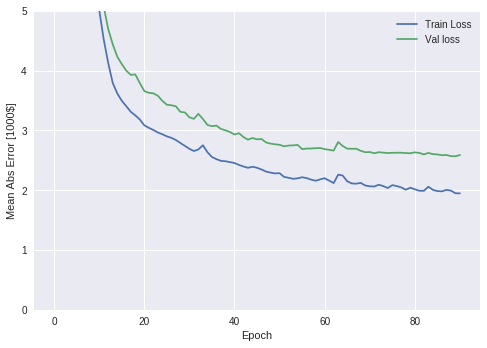

In [12]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

num_epochs = 500

history = model.fit(train_data, train_labels, epochs=num_epochs,
                    validation_split=0.2, verbose=1,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)

In [13]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $3097.86


With the trained model, we do some predictions on test data set

In [14]:
test_predictions = model.predict(test_data).flatten()

print(test_predictions)

[ 8.19076   17.943827  20.71876   32.489243  25.294855  18.73264
 26.672316  21.449768  19.30733   22.972408  19.090092  17.204214
 15.127117  42.369316  18.505974  19.626247  26.707184  20.947126
 20.415056  34.62944   11.615513  15.111501  20.55669   14.255651
 21.661686  25.226025  31.137041  28.549023  10.73856   21.188473
 18.839575  14.494545  32.25223   25.057465  17.592875   8.394394
 15.132157  16.81644   19.810356  26.434563  28.288536  28.432468
 14.654302  40.7569    31.05914   24.732306  26.560736  15.401086
 24.68029   21.83911   34.70629   19.597912  12.706388  14.845759
 34.017868  28.0956    12.033566  48.151615  33.20235   23.077646
 25.088022  17.951036  14.421657  17.937855  23.209425  22.330423
 13.534879  23.126137  14.057035   6.6234417 35.13518   30.264463
 26.69703   14.21132   25.749409  17.273014  20.152891  22.886103
 35.148376  11.377796  19.478497  38.076122  15.105608  13.724956
 16.952284  17.595072  20.109032  21.499146  21.835892  32.438583
 18.738077 